In [13]:
import daspi as dsp
import pandas as pd
import matplotlib.pyplot as plt
DPI = 120
KW_PLOT = dict(visible_spines='none', hide_axis='both')
BASE_FIGSIZE = 2
img_dir = '../docs/img/'
dsp.STR._username_ = 'j4ggr'
dsp.__version__

'1.5.0'

### AxesFacets

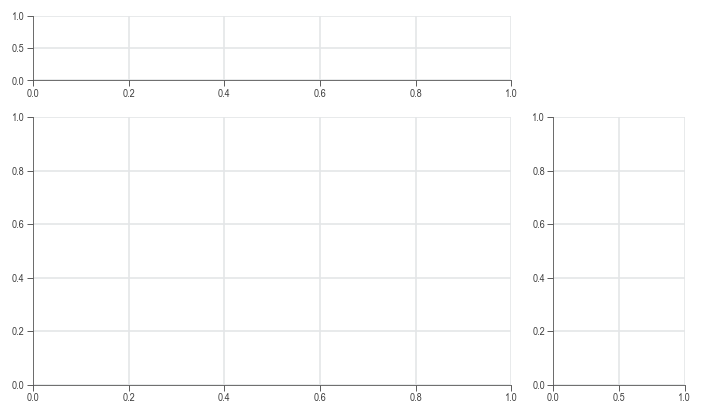

In [10]:
axes = dsp.AxesFacets(mosaic=[
    'aaa.',
    'bbbc',
    'bbbc',
    'bbbc'])
axes.figure.savefig(img_dir+'facets_axes-mosaic.png', bbox_inches='tight', dpi=DPI)

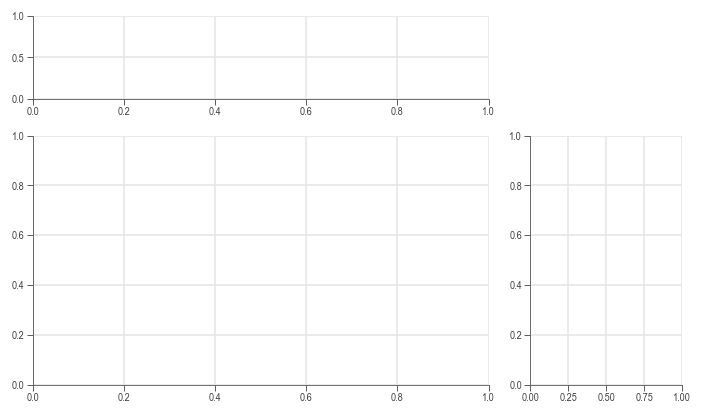

In [11]:
axes = dsp.AxesFacets(
    mosaic=['a.', 'bc'], width_ratios=[3, 1], height_ratios=[1, 3])

### StripesFacets

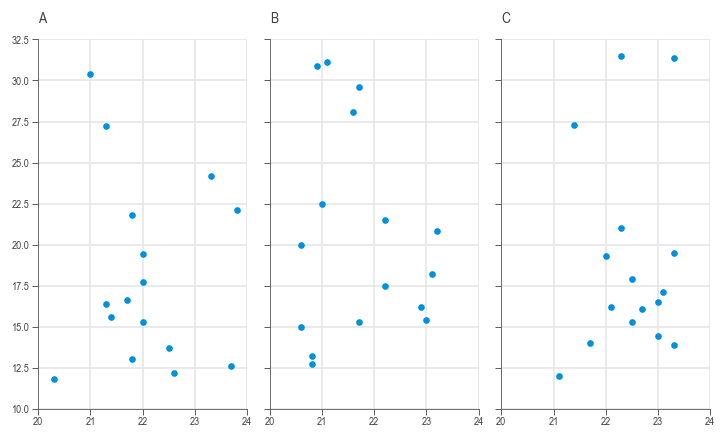

In [23]:
import daspi as dsp
import matplotlib.pyplot as plt

df = dsp.load_dataset('aspirin-dissolution')

fig, axes = plt.subplots(
    nrows=1, ncols=df['employee'].nunique(), sharex=True, sharey=True)

for ax, (name, group) in zip(axes, df.groupby('employee')):
    ax.scatter(group['temperature'], group['dissolution'])
    ax.set_title(str(name))

ax.figure.savefig(img_dir+'facets_stripes-missing.png', bbox_inches='tight', dpi=DPI)

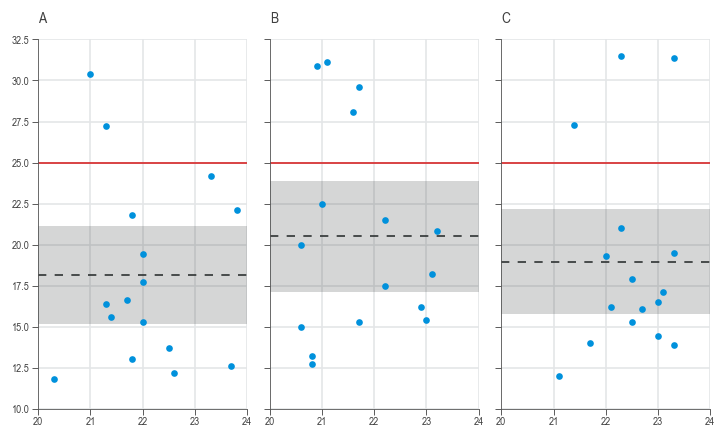

In [22]:
import daspi as dsp
import matplotlib.pyplot as plt

df = dsp.load_dataset('aspirin-dissolution')

fig, axes = plt.subplots(
    nrows=1, ncols=df['employee'].nunique(), sharex=True, sharey=True)

for ax, (name, group) in zip(axes, df.groupby('employee')):
    stripes = dsp.StripesFacets(
        group['dissolution'],
        target_on_y=True,
        single_axes=False,
        mean=True,
        confidence=0.95,
        spec_limits=dsp.SpecLimits(upper=25))
    ax.scatter(group['temperature'], group['dissolution'])
    ax.set_title(str(name))
    stripes.draw(ax)

ax.figure.savefig(img_dir+'facets_stripes-drawn.png', bbox_inches='tight', dpi=DPI)

### LabelFacets


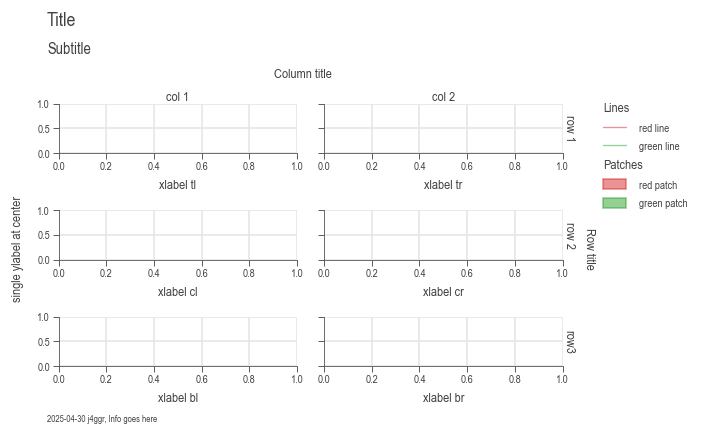

In [ ]:
import daspi as dsp
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

axes = dsp.AxesFacets(nrows=3, ncols=2, sharey=True)

green = dsp.COLOR.GOOD
red = dsp.COLOR.BAD

legend_data={
    'Lines': [
        (Line2D([0], [0], c=red), Line2D([0], [0], c=green)),
        ('red line', 'green line')],
    'Patches': [
        (Patch(color=red), Patch(color=green)), 
        ('red patch', 'green patch')]}

labels = dsp.LabelFacets(
    axes,
    fig_title='Title',
    sub_title='Subtitle',
    xlabel=('xlabel tl', 'xlabel tr', 'xlabel cl', 'xlabel cr', 'xlabel bl', 'xlabel br'),
    ylabel='single ylabel at center',
    info='Info goes here',
    cols=('col 1', 'col 2'),
    col_title='Column title',
    rows=('row 1', 'row 2', 'row3'),
    row_title='Row title',
    legend_data=legend_data)
labels.draw()
axes.figure.savefig(img_dir+'facets_labels.png', bbox_inches='tight', dpi=DPI)

### Combination

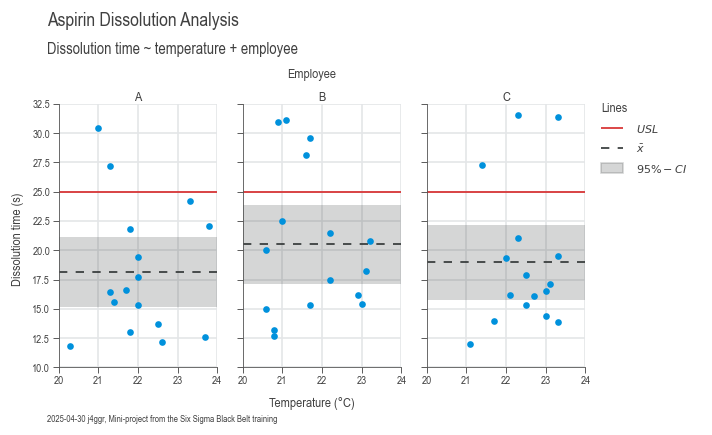

In [ ]:
import daspi as dsp

df = dsp.load_dataset('aspirin-dissolution')

axes = dsp.AxesFacets(
    nrows=1, ncols=df['employee'].nunique(), sharex=True, sharey=True)

for ax, (name, group) in zip(axes, df.groupby('employee')):
    stripes = dsp.StripesFacets(
        group['dissolution'],
        target_on_y=True,
        single_axes=False,
        mean=True,
        confidence=0.95,
        spec_limits=dsp.SpecLimits(upper=25))
    ax.scatter(group['temperature'], group['dissolution'])
    stripes.draw(ax)

legend_data = {'Lines': stripes.handles_labels()}

labels = dsp.LabelFacets(
    axes,
    fig_title='Aspirin Dissolution Analysis',
    sub_title='Dissolution time ~ temperature + employee',
    xlabel='Temperature (°C)',
    ylabel='Dissolution time (s)',
    info='Mini-project from the Six Sigma Black Belt training',
    cols=tuple(df['employee'].unique()),
    col_title='Employee',
    legend_data=legend_data)
labels.draw()

axes.figure.savefig(img_dir+'facets_combined.png', bbox_inches='tight', dpi=DPI)

## Plotters

c:\Appl\Python\.virtualenvs\DataScience-DY0ovQ8g-3.11\Lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


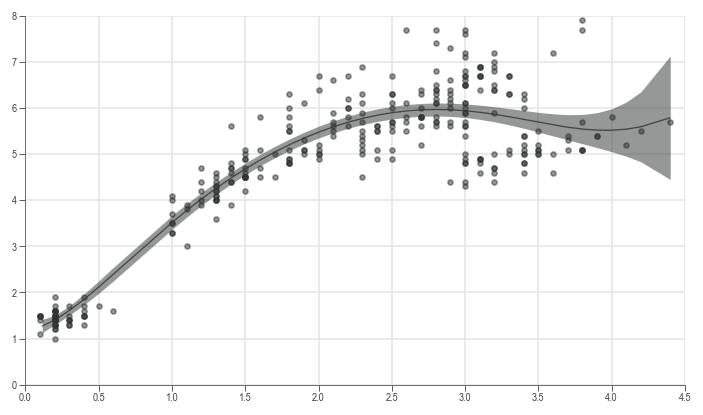

In [9]:
dsp.style.use('daspi')

df = dsp.load_dataset('iris')
axes = dsp.AxesFacets(nrows=1, ncols=1)
kwds = dict(
    source=df,
    target='length',
    feature='width',
    color=dsp.DEFAULT.PLOTTING_COLOR,
    ax=axes[0])

loess_plot = dsp.LoessLine(show_ci=True, **kwds)
loess_plot()
scatter_plot = dsp.Scatter(**kwds)
scatter_plot()

axes.figure.savefig(img_dir+'plotters_xy-example.png', bbox_inches='tight', dpi=DPI)


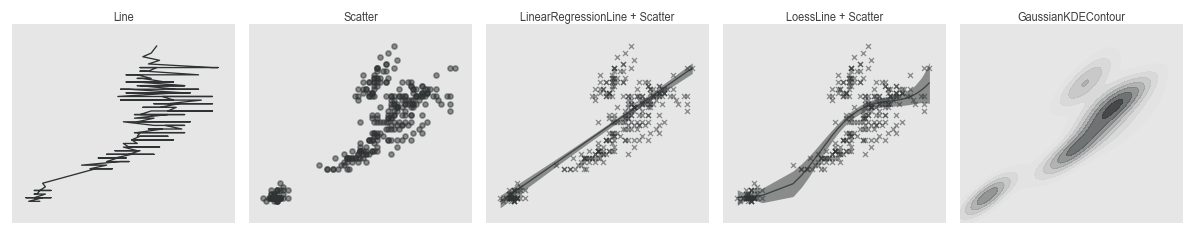

In [ ]:
dsp.style.use('daspi-dark')
target='width'
feature='length'
df = dsp.load_dataset('iris').sort_values(target)

plots = (
    'Line', 'Scatter', 'LinearRegressionLine + Scatter', 'LoessLine + Scatter', 
    'GaussianKDEContour')
n_plots = len(plots)

chart = dsp.JointChart(
        source=df,
        target=target,
        feature=feature,
        nrows=1,
        ncols=n_plots,
        sharex=True,
        sharey=True,
        figsize=(BASE_FIGSIZE*n_plots, BASE_FIGSIZE)
    ).plot(
        dsp.Line,
        **KW_PLOT
    ).plot(
        dsp.Scatter,
        **KW_PLOT
    ).plot(
        dsp.LinearRegressionLine,
        show_fit_ci=True,
        show_scatter=False,
        **KW_PLOT
    ).plot(
        dsp.Scatter,
        marker='x',
        on_last_axes=True
    ).plot(
        dsp.LoessLine,
        show_ci=True,
        **KW_PLOT
    ).plot(
        dsp.Scatter,
        marker='x',
        on_last_axes=True
    ).plot(
        dsp.GaussianKDEContour,
        **KW_PLOT
    ).label(
        cols=plots,
    )
chart.axes[0, 0].set(xlim=(0.5, 8.5), ylim=(-0.5, 5))
chart.save(img_dir+'plotters_xy.png', dpi=DPI)

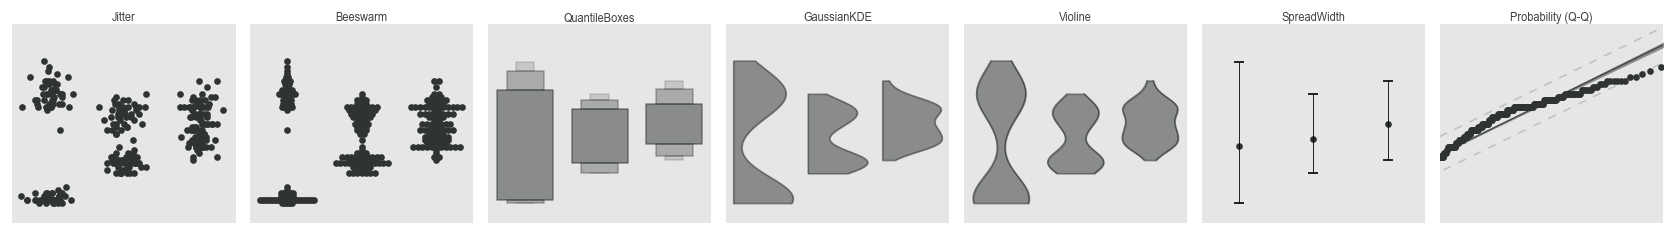

In [ ]:
dsp.style.use('daspi-dark')
target='width'
feature='species'
df = dsp.load_dataset('iris')

plots = (
    'Jitter', 'Beeswarm', 'QuantileBoxes', 'GaussianKDE', 'Violine', 
    'SpreadWidth', 'Probability (Q-Q)')
n_plots = len(plots)

chart = dsp.JointChart(
        source=df,
        target=target,
        feature=feature,
        nrows=1,
        ncols=n_plots,
        sharey=True,
        target_on_y=True,
        categorical_feature=True,
        figsize=(BASE_FIGSIZE*n_plots, BASE_FIGSIZE)
    ).plot(
        dsp.Jitter,
        **KW_PLOT
    ).plot(
        dsp.Beeswarm,
        **KW_PLOT
    ).plot(
        dsp.QuantileBoxes,
        **KW_PLOT
    ).plot(
        dsp.GaussianKDE,
        agreements=(),
        ignore_feature=False,
        **KW_PLOT
    ).plot(
        dsp.Violine,
        agreements=(),
        **KW_PLOT
    ).plot(
        dsp.SpreadWidth,
        strategy='data',
        **KW_PLOT
    ).plot(
        dsp.Probability,
        **KW_PLOT
    ).label(
        cols=plots,
    )
chart.axes[0, 3].set(xlim=(-0.1, 2.9))
chart.axes[0, 6].set(ylim=(-0.5, 5.5))
chart.save(img_dir+'plotters_univariate.png', dpi=DPI)


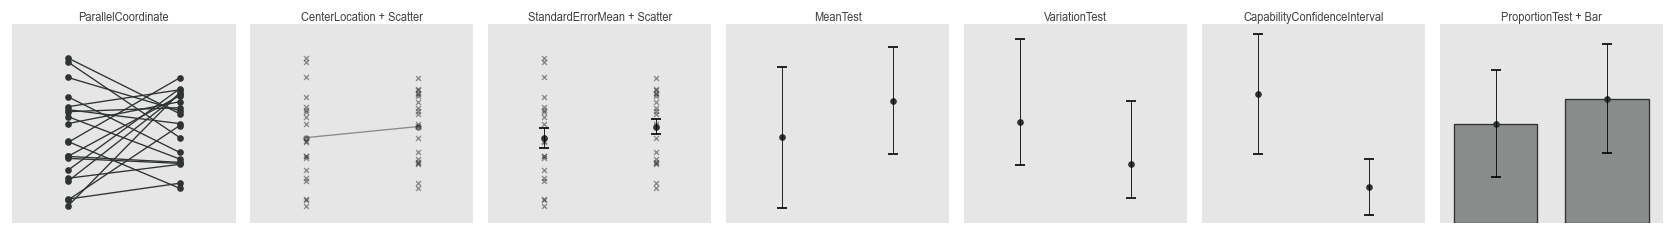

In [ ]:
dsp.style.use('daspi-dark')
target='distance'
feature='method'
osg=50
df = dsp.load_dataset('drop_card')
df['identity'] = list(range(len(df)//2)) * 2
df['observations'] = 1
df['events'] = list(map(lambda x: 1 if x > osg else 0, df[target]))
df['proportion'] = list(map(lambda x: 2/len(df) if x else 0, df['events']))

plots = (
    'ParallelCoordinate', 'CenterLocation + Scatter', 
    'StandardErrorMean + Scatter', 'MeanTest', 'VariationTest', 
    'CapabilityConfidenceInterval', 'ProportionTest + Bar')
n_plots = len(plots)

chart = dsp.JointChart(
        source=df,
        target=(target,)*(n_plots -1) + ('proportion', ),
        feature=feature,
        nrows=1,
        ncols=n_plots,
        target_on_y=True,
        categorical_feature=True,
        figsize=(BASE_FIGSIZE*n_plots, BASE_FIGSIZE)
    ).plot(
        dsp.ParallelCoordinate,
        identity='identity',
        **KW_PLOT
    ).plot(
        dsp.CenterLocation,
        **KW_PLOT
    ).plot(
        dsp.Scatter,
        marker='x',
        on_last_axes=True,
        **KW_PLOT
    ).plot(
        dsp.StandardErrorMean,
        **KW_PLOT
    ).plot(
        dsp.Scatter,
        marker='x',
        on_last_axes=True,
        **KW_PLOT
    ).plot(
        dsp.MeanTest,
        n_groups=1,
        **KW_PLOT
    ).plot(
        dsp.VariationTest,
        n_groups=1,
        **KW_PLOT
    ).plot(
        dsp.CapabilityConfidenceInterval,
        n_groups=1,
        kind='cpk',
        spec_limits=dsp.SpecLimits(upper=osg),
        **KW_PLOT
    ).plot(
        dsp.ProportionTest,
        n_groups=1,
        observations='observations',
        events='events',
        **KW_PLOT
    ).plot(
        dsp.Bar,
        method='sum',
        on_last_axes=True,
        **KW_PLOT
    ).label(
        cols=plots,
    )
# chart.axes[0, 3].set(xlim=(-0.1, 2.9))
# chart.axes[0, 6].set(ylim=(-0.5, 5.5))
chart.save(img_dir+'plotters_differences.png', dpi=DPI)

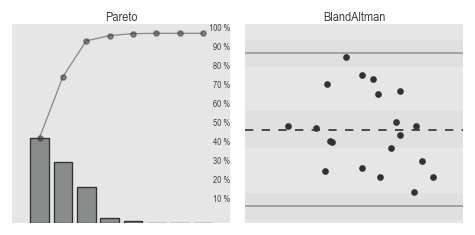

In [ ]:
dsp.style.use('daspi-dark')
plots = (
    'Pareto', 'BlandAltman')
n_plots = len(plots)

axes = dsp.AxesFacets(
    nrows=1,
    ncols=n_plots,
    figsize=(BASE_FIGSIZE*n_plots, BASE_FIGSIZE)
)

model = dsp.LinearModel(
    source=dsp.load_dataset('aspirin-dissolution'),
    target='dissolution',
    features=['employee', 'stirrer', 'brand', 'catalyst', 'water'],
    disturbances=['temperature', 'preparation']).fit()
effects =  model.effects()
data = (pd
    .concat([model.anova('I'), effects], axis=1)
    .reset_index(drop=False)
    .rename(columns={'index': dsp.ANOVA.SOURCE}))

pareto = dsp.Pareto(
    source=data,
    target=dsp.ANOVA.TABLE_COLNAMES[1],
    feature=dsp.ANOVA.SOURCE,
    visible_spines ='none',
    hide_axis= 'both',
    color=dsp.DEFAULT.PLOTTING_COLOR,
    ax=axes[0, 0])
pareto()

data = dsp.load_dataset('drop_card')
data['identity'] = list(range(len(data)//2)) * 2
blantaltman = dsp.BlandAltman(
    source=data,
    target='distance',
    feature='method',
    identity='identity',
    visible_spines ='none',
    hide_axis= 'both',
    color=dsp.DEFAULT.PLOTTING_COLOR,
    ax=axes[0, 1])
blantaltman()

labels = dsp.LabelFacets(
    axes,
    cols=plots).draw()

axes.figure.savefig(img_dir+'plotters_special.png', bbox_inches='tight', dpi=DPI)

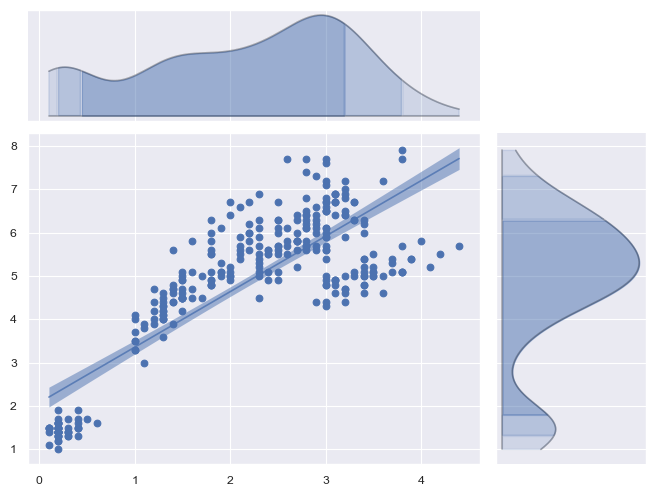

In [ ]:
import daspi as dsp
import matplotlib.pyplot as plt

dsp.style.use('seaborn')

exogenous ='length'
endogenous = 'width'
df = dsp.load_dataset('iris').sort_values(target)
fig, axs = plt.subplots(
    2, 2, sharex='col', sharey='row', width_ratios=[3, 1], height_ratios=[1, 3])

tl_kde = dsp.GaussianKDE(
    source=df,
    target=endogenous,
    target_on_y=False,
    hide_axis='feature',
    visible_spines='target',
    ax=axs[0, 0])
tl_kde()

tr_hide = dsp.HideSubplot(axs[0, 1])
tr_hide()

bl_linreg = dsp.LinearRegressionLine(
    source=df,
    target=exogenous,
    feature=endogenous,
    show_fit_ci=True,
    ax=axs[1, 0])
bl_linreg()

br_kde = dsp.GaussianKDE(
    source=df,
    target=exogenous,
    target_on_y=True,
    hide_axis='feature',
    visible_spines='target',
    ax=axs[1, 1])
br_kde()